## 👉 08-01. 자연어 처리 전처리 이해하기

## 1. 토큰화 (Tokenization)

In [1]:
en_text = "A Dog Run back corner near spare bedrooms"

### (1) spaCy 사용하기

* 'spaCy' is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython.
* Unlike NLTK, which is widely used for teaching and research, spaCy focuses on providing software for production usage.
* 출처 : https://en.wikipedia.org/wiki/SpaCy

In [2]:
import spacy
spacy_en = spacy.load('en_core_web_sm')

In [3]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [4]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### (2) NLTK 사용하기

* The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. 
* It supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities.
* 출처 : https://en.wikipedia.org/wiki/Natural_Language_Toolkit

In [5]:
import nltk
from nltk.tokenize import word_tokenize

In [6]:
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### (3) 띄어쓰기로 토큰화

In [7]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### (4) 한국어 띄어쓰기 토큰화

In [8]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. \
그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 \
슈퍼에 가서 사과랑 오렌지 사왔어"

In [9]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


### (5) 형태소 토큰화

In [10]:
# mekab 대신에 konlpy에서 기본 지급하는 Kkma를 사용함.
from konlpy.tag import Kkma

In [11]:
tokenizer = Kkma()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀랍', 'ㄴ', '효능', '이', '라는', '글', '을', '보', '았', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '하', '었', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '아서', '사과', '랑', '오렌지', '사', '아', '오', '았', '어']


### (6) 문자 토큰화

In [12]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


## 2. 단어 집합(Vocabulary) 생성

In [13]:
import urllib.request
import pandas as pd
from konlpy.tag import Kkma
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x26fa8c396c0>)

In [15]:
data = pd.read_table('ratings.txt')
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [16]:
print("전체 샘플의 수 : {}".format(len(data)))

전체 샘플의 수 : 200000


In [17]:
sample_data = data[:100]

In [18]:
sample_data["document"] = sample_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
sample_data

C:\Users\Family\AppData\Local\Temp\ipykernel_32396\1156025829.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data["document"] = sample_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
C:\Users\Family\AppData\Local\Temp\ipykernel_32396\1156025829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data["document"] = sample_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
95,3908729,진짜 최고다 최고 성룡형님 마이 우상,1
96,6318878,당신이 좋아하는 장르는 뭐요 이영화에도 저영화에도 이런장르는 싫다니원,1
97,2620222,지금까지 본영화중에 최고다,1
98,5954450,매회리타가자꾸거슬려서죽었으면좋겠다고생각했는데ㅠㅠ죄책감에나도잠못이룬다,1


In [19]:
stopwords=['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', 
           '를', '으로', '자', '에', '와', '한', '하다']

In [20]:
tokenizer = Kkma()
tokenized = []
for sentence in sample_data["document"]:
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

In [21]:
print(tokenized[:10])

[['어리', 'ㄹ', '때', '보고', '지금', '다시', '보', '아도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일구', 'ㄴ', '전통', '을', '통하', '어', '발전', '하', '어', '갈', '문화', '산업', '부럽', '었', '는데', '사실', '우리나라', '에서', '그', '어렵', 'ㄴ', '시절', '끝', '까지', '열정', '을', '지키', 'ㄴ', '노', '라', '노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이루', '어', '나가', 'ㄹ', '수', '있', '다는', '것', '감사', '하', 'ㅂ니다'], ['폴리스', '스토리', '시리즈', '부', '터', '뉴', '까', '지', '버리', 'ㄹ게', '하나', '없', '음', '최고'], ['오', '아', '연기', '진짜', '개', '쩔', '구', '나', '아', '지루', '하', 'ㄹ', '거', '라고', '생각', '하', '었', '는데', '몰입', '하', '어서', '보', '았', '다', '그리하', '여', '이렇', 'ㄴ', '것', '진짜', '영화', '짓'], ['안개', '자욱', '하', 'ㄴ', '밤하늘', '뜨', '어', '있', '초승달', '같', '영화'], ['사랑', '을', '해보', 'ㄴ', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', 'ㅂ니다', '다시', '보', '아도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', 'ㄴ', '듯']]


In [22]:
vocab = FreqDist(np.hstack(tokenized))
print("단어 집합의 크기 : {}".format(len(vocab)))

단어 집합의 크기 : 671


In [23]:
vocab["재밌"]

9

In [24]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print("단어 집합의 크기 : {}".format(len(vocab)))

단어 집합의 크기 : 500


## 3. 각 단어에 고유한 정수 부여

In [25]:
word_to_index = {word[0] : index+2 for index, word in enumerate(vocab)}
word_to_index["pad"] = 1
word_to_index["unk"] = 0

In [26]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index["unk"])
            
    encoded.append(temp)

In [27]:
print(encoded[:10])

[[50, 8, 31, 118, 51, 38, 5, 65, 22, 23, 52], [201, 10, 85, 202, 203, 204, 53, 205, 3, 119, 10, 206, 11, 207, 2, 11, 120, 121, 208, 209, 6, 18, 66, 122, 32, 53, 210, 3, 123, 124, 54, 211, 10, 212, 3, 125, 39, 125, 20, 119, 12, 11, 40, 20, 41, 213, 10, 214, 9, 126, 11, 215, 8, 19, 12, 86, 15, 216, 2, 67], [217, 127, 218, 219, 128, 220, 129, 42, 221, 222, 87, 16, 28, 17], [68, 24, 43, 33, 130, 223, 88, 25, 24, 224, 2, 8, 44, 69, 34, 2, 6, 18, 225, 2, 35, 5, 13, 4, 226, 70, 227, 3, 15, 33, 7, 89], [228, 229, 2, 3, 230, 231, 11, 12, 232, 20, 7], [131, 10, 233, 3, 41, 132, 133, 71, 124, 54, 134, 10, 19, 12, 7], [135, 55, 67, 38, 5, 65, 55], [130, 234, 36, 235, 36, 72, 236, 5, 9, 45, 28], [56], [237, 90, 39, 238, 239, 3, 136]]


## 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

리뷰의 최대 길이 : 70
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 15.910000


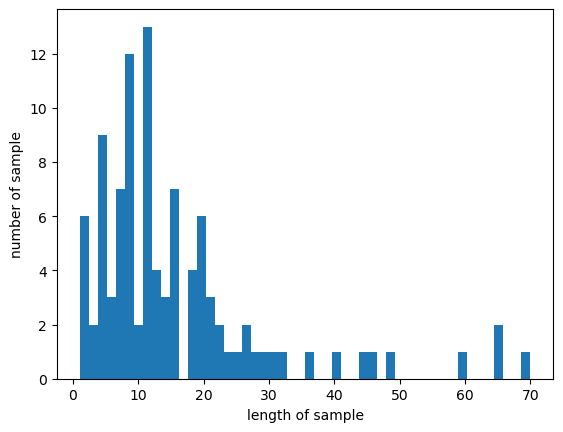

In [28]:
max_len = max(len(l) for l in encoded)
print("리뷰의 최대 길이 : %d" % max_len)
print("리뷰의 최소 길이 : %d" % min(len(l) for l in encoded))
print("리뷰의 평균 길이 : %f" % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.show()

In [29]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index["pad"]] * (max_len - len(line))

In [30]:
print("리뷰의 최대 길이 : %d" % max(len(l) for l in encoded))
print("리뷰의 최소 길이 : %d" % min(len(l) for l in encoded))
print("리뷰의 평균 길이 : %f" % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 70
리뷰의 최소 길이 : 70
리뷰의 평균 길이 : 70.000000


In [31]:
print(encoded[:3])

[[50, 8, 31, 118, 51, 38, 5, 65, 22, 23, 52, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [201, 10, 85, 202, 203, 204, 53, 205, 3, 119, 10, 206, 11, 207, 2, 11, 120, 121, 208, 209, 6, 18, 66, 122, 32, 53, 210, 3, 123, 124, 54, 211, 10, 212, 3, 125, 39, 125, 20, 119, 12, 11, 40, 20, 41, 213, 10, 214, 9, 126, 11, 215, 8, 19, 12, 86, 15, 216, 2, 67, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [217, 127, 218, 219, 128, 220, 129, 42, 221, 222, 87, 16, 28, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
